<a href="https://colab.research.google.com/github/ViniciusMangueira/Data_Science/blob/main/Movehub_Ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto

## Importação dos Dados

Inicialmente, vamos importar os dados e na sequência ver o formato do arquivo.

In [1]:
# Bibliotecas
import pandas as pd
import missingno as msno
import seaborn as sns

In [35]:
# Importar arquivos 
df1 = pd.read_csv("/content/cities.csv")
df2 = pd.read_csv("/content/movehubcostofliving.csv")
df3 = pd.read_csv("/content/movehubqualityoflife.csv")

In [3]:
print(f"O df1 tem {df1.shape[0]} entradas e {df1.shape[1]} variáveis.")
print(f"O df2 tem {df2.shape[0]} entradas e {df2.shape[1]} variáveis.")
print(f"O df3 tem {df3.shape[0]} entradas e {df3.shape[1]} variáveis.")

O df1 tem 3543 entradas e 2 variáveis.
O df2 tem 216 entradas e 7 variáveis.
O df3 tem 216 entradas e 7 variáveis.


Dessa forma, pelo número de entradas muito diferente, percebemos que nem todas as cidades do df1 estão catalogadas nos datasets df2 e df3.

Para termos uma ideia melhor, vamos colocar as entradas para serem exibidas por ordem alfabética do nome da cidade e, posteriormente, ver as 5 primeiras entradas de cada dataset.

In [4]:
df1 = df1.sort_values(by="City", ascending=True).reset_index(drop=True)
df2 = df2.sort_values(by="City", ascending=True).reset_index(drop=True)
df3 = df3.sort_values(by="City", ascending=True).reset_index(drop=True)

In [5]:
# Ver as 5 primeiras entradas do df1
df1.head()

,City,Country
0,A Coruña,Spain
1,Aachen,Germany
2,Aalborg,Denmark
3,Aarhus,Denmark
4,Aba,Nigeria


In [6]:
# Ver as 5 primeiras entradas do df2
df2.head()

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Aachen,2.05,6.88,4.26,1.33,767.23,1619.72
1,Aberdeen,1.99,6.98,5.98,1.37,1195.74,1743.78
2,Abu Dhabi,2.67,6.23,13.73,0.30,1779.93,2135.92
3,Addis Ababa,0.46,2.29,4.18,0.72,653.77,124.22
4,Adelaide,2.49,11.42,10.08,0.95,1382.26,2911.69


In [7]:
# Ver as 5 primeiras entradas do df3
df3.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Aachen,81.64,60.55,73.25,11.69,90.52,15.34
1,Aberdeen,81.89,49.70,82.86,34.31,76.77,24.22
2,Abu Dhabi,86.40,68.03,48.02,53.42,80.80,10.86
3,Addis Ababa,59.88,6.38,63.89,85.59,28.41,26.04
4,Adelaide,87.29,72.03,56.25,12.01,91.54,41.32


Pela visualização acima, notamos que das 5 cidades que a aparecem no df1 apenas Aachen (Alemanha) aparece no df2 e no df3.

## Análise Inicial

### Dados Faltantes

Nesse momento, estamos interessados em saber se existem dados faltantes nos datasets. Para isso, utilizaremos a biblioteca **MissingNo** que nos proporcionará uma visualização interativa dos famosos dados ‘NaN’.

Vale lembrar, para os que nunca viram essa biblioteca, que para sabermos a quantidade de valores faltantes basta olharmos o número que fica em cima da barra da variável e compará-lo com o númerona parte superior direita, se forem iguais não existem dados faltantes e caso sejam diferentes temos valores faltantes. 

Por exemplo, para o **df1**, temos as variáveis `City` e `Country` com 3543 e 3540 valores, respectivamente. Ao olharmos pra parte superior direita vemos que o total de entradas são 3543 e, desta forma, percebemos que não existem dados nulos para `City` e já para `Country` temos 3 valores faltantes.

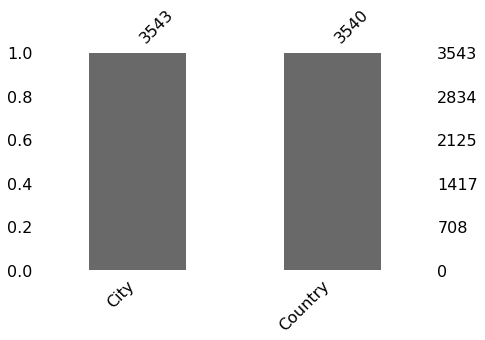

In [22]:
# Dados faltantes de df1
msno.bar(df1, figsize=(7, 4));

Na sequência, vemos que para **df2** e **df3** não existem valores nulos para nenhuma coluna.

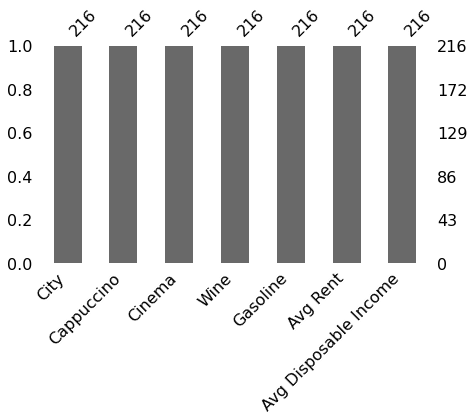

In [23]:
# Dados faltantes de df2
msno.bar(df2, figsize=(7, 4));

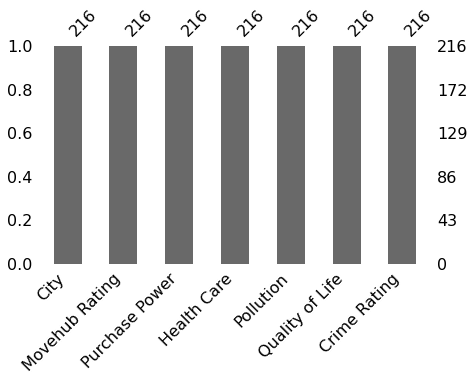

In [24]:
# Dados faltantes de df3
msno.bar(df3, figsize=(7, 4));

### Outliers

Ao fim de nossa breve análise inicial, queremos saber se existem outliers no nosso dataset para podermos tratá-los a fim de que, no futuro, eles não atrapalhem nossos insights.

Ao fim de nossa breve análise inicial, queremos saber se existem outliers no nosso dataset para podermos tratá-los a fim de que, no futuro, eles não atrapalhem nossos insights. Assim, vamos usar o famigerado método *describe*.

In [25]:
# Estatísticas do df1
df1.describe()

,City,Country
count,3543,3540
unique,3489,175
top,City,China
freq,24,435


Na sequência, temos as estatísticas do df2. Nela podemos perceber a presença de outliers nas colunas `Cinema`, `Wine` e `Avg Rent`. Por exemplo, em `Cinema` enquanto 75% dos dados tem o valor de 7.85 o máximo tem 79.49 e já em `Wine` 75% tem o valor 8.47 o máximo tem 26.15.

In [26]:
# Estatísticas do df2
df2.describe()

,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,1.981481,6.775602,7.079722,1.001898,1092.979213,1413.530463
std,0.737131,5.632751,3.325691,0.351713,664.778486,912.013027
min,0.460000,1.810000,2.130000,0.070000,120.680000,120.680000
25%,1.320000,4.397500,4.260000,0.735000,609.015000,549.860000
50%,2.085000,6.540000,6.540000,0.950000,980.650000,1535.415000
75%,2.490000,7.850000,8.472500,1.320000,1388.095000,2053.812500
max,4.480000,79.490000,26.150000,1.690000,5052.310000,4266.110000


Por fim, nas estatísticas do df3 vemos que os dados estão bem distribuídos e não existem outliers que vão nos atrapalhar.

In [27]:
# Estatísticas do df3
df3.describe()

,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,79.676713,46.477176,66.442824,45.240370,59.994537,41.338611
std,6.501011,20.614519,14.416412,25.369741,22.019376,16.416409
min,59.880000,6.380000,20.830000,0.000000,5.290000,9.110000
25%,75.070000,28.815000,59.420000,24.410000,42.752500,29.375000
50%,81.060000,49.220000,67.685000,37.210000,65.150000,41.140000
75%,84.020000,61.607500,77.207500,67.675000,78.617500,51.327500
max,100.000000,91.850000,95.960000,92.420000,97.910000,85.700000


### Concatenação dos Datasets df2 e df3

In [9]:
#df1.groupby('Country', inplace=True)

Para facilitar o trabalho futuro, vamos concatenar df2 com df3.

In [10]:
#df2.set_index('City', inplace=True)
#df3.set_index('City', inplace=True)

In [11]:
# Excluir a coluna City que ficaria duplicada
df3.drop(columns='City', inplace=True)

# Concatenação dos datasets df2 e df3
df_concat = pd.concat(objs=[df2, df3], axis=1)
df_concat

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Aachen,2.05,6.88,4.26,1.33,767.23,1619.72,81.64,60.55,73.25,11.69,90.52,15.34
1,Aberdeen,1.99,6.98,5.98,1.37,1195.74,1743.78,81.89,49.70,82.86,34.31,76.77,24.22
2,Abu Dhabi,2.67,6.23,13.73,0.30,1779.93,2135.92,86.40,68.03,48.02,53.42,80.80,10.86
3,Addis Ababa,0.46,2.29,4.18,0.72,653.77,124.22,59.88,6.38,63.89,85.59,28.41,26.04
4,Adelaide,2.49,11.42,10.08,0.95,1382.26,2911.69,87.29,72.03,56.25,12.01,91.54,41.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Warsaw,1.66,5.19,5.19,1.18,726.59,664.31,76.76,35.77,63.33,86.16,51.82,32.03
212,Washington,2.37,7.85,7.85,0.69,2451.63,2484.32,81.74,56.61,64.44,30.55,76.92,51.43
213,Wellington,2.20,8.82,8.27,1.17,1515.65,1763.67,81.06,49.11,73.72,30.55,79.83,27.38
214,Zagreb,1.12,3.70,4.48,1.23,504.36,605.23,73.84,26.71,52.78,83.45,47.59,32.29


Em seguida, vamos dar uma olhada nas informações do df_concat.

In [12]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   216 non-null    object 
 1   Cappuccino             216 non-null    float64
 2   Cinema                 216 non-null    float64
 3   Wine                   216 non-null    float64
 4   Gasoline               216 non-null    float64
 5   Avg Rent               216 non-null    float64
 6   Avg Disposable Income  216 non-null    float64
 7   Movehub Rating         216 non-null    float64
 8   Purchase Power         216 non-null    float64
 9   Health Care            216 non-null    float64
 10  Pollution              216 non-null    float64
 11  Quality of Life        216 non-null    float64
 12  Crime Rating           216 non-null    float64
dtypes: float64(12), object(1)
memory usage: 22.1+ KB


## Histograma das Variáveis

Abaixo vemos o histograma das variáveis numéricas do dataset *df_concat*. Com ele podemos ver novamente a presença de outliers nas variáveis que já listamos.

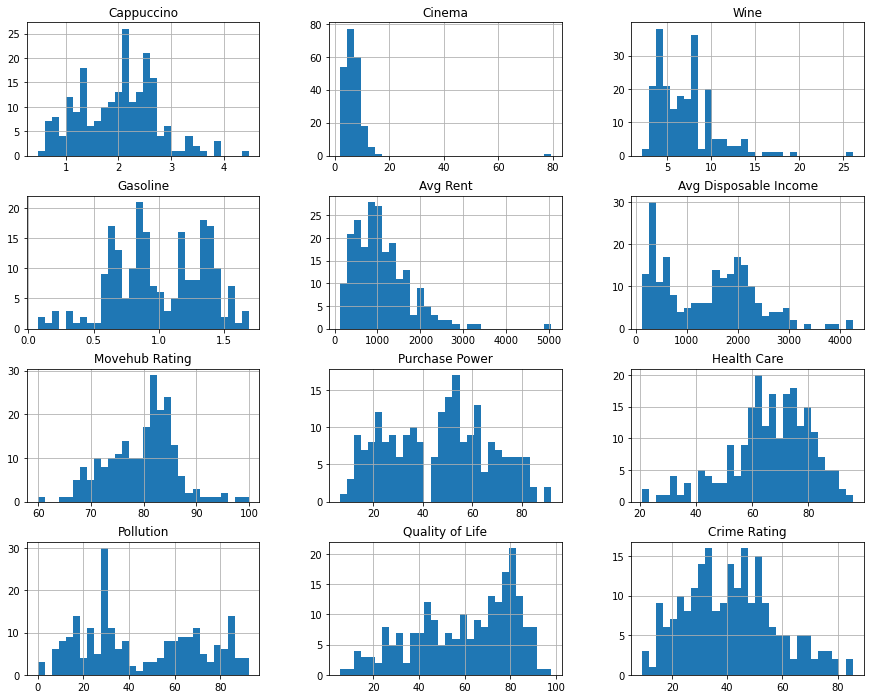

In [32]:
# Histograma
df_concat.hist(bins=30, figsize=(15,12));

Assim para uma melhor visualização, vamos excluir os outliers.

In [120]:
#Remover os outliers
df_clean = df_concat.copy()
df_clean.drop(df_clean[df_clean['Cinema']> 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['Avg Rent']>3500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['Wine']>15].index, axis=0, inplace=True)

Plotando novamente o histograma, só que agora sem os outliers, percebemos uma melhora na qualidade da visualização que nos permite entender melhor os dados.

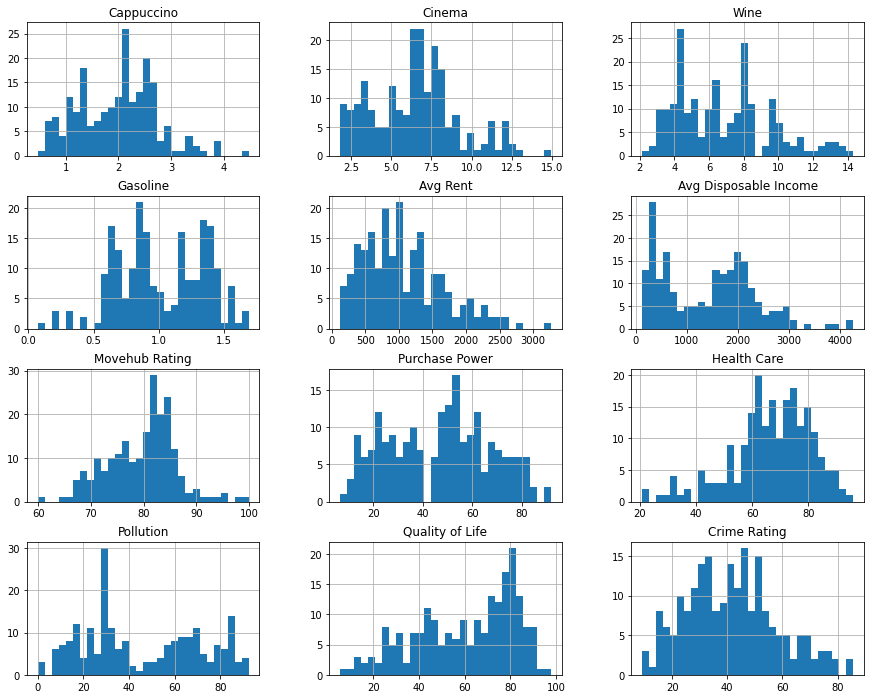

In [121]:
# Histograma
df_clean.hist(bins=30, figsize=(15,12));

Por exemplo, para a variável `Wine`, temos 2 picos no gráfico um para valores um pouco maiores do que 4 e outro para o valor 8. Além disso, notamos que os preços sem os outliers variam do valor 2 ate aproximadamente o valor 14. 

Um insight interessante sobre isso, seria o cuidado ao colocar o valor do vinho maior do que 10, pois vemos uma pouca quantidade e isso pode significar que outros locais tentaram vender acima não conseguiram e posteriormente baixaram o preço! 


## Movehub Rating

Na sequência, analisaremos quais são as 10 cidades mais bem classificadas pela Movehub.

In [40]:
# Ver as 10 Cidades que tem a maior classificação pela Movehub Rating
df_concat.sort_values(by='Movehub Rating', ascending=False).head(10)

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
115,London,2.49,11.26,6.98,1.40,2590.76,1992.89,100.00,53.17,69.53,57.95,47.89,50.14
66,Dubai,2.62,6.23,12.77,0.31,1981.57,2313.91,98.44,69.64,67.78,30.81,85.16,19.36
154,Paris,2.56,8.95,5.11,1.32,2131.21,2045.96,95.92,47.08,83.33,59.18,52.62,53.75
156,Perth,2.87,11.43,10.08,0.97,2083.14,3358.55,95.38,62.11,80.56,23.53,74.62,50.01
190,Sydney,2.35,12.10,10.75,1.00,2788.71,2755.12,94.53,54.82,71.27,18.48,74.32,32.80
128,Melbourne,2.35,12.10,10.08,0.95,2073.06,2623.41,92.58,55.48,76.67,30.28,68.99,48.75
64,Doha,2.78,6.28,14.32,0.18,2221.74,2775.58,90.73,81.96,68.06,83.45,80.28,27.17
144,New York,2.58,8.50,9.81,0.69,3268.84,2530.09,90.53,55.56,51.39,12.01,61.94,47.33
67,Dublin,2.39,8.31,8.52,1.39,1278.72,1918.09,90.45,50.13,41.12,30.54,65.27,48.31
26,Berlin,1.88,6.82,3.84,1.36,916.42,1772.57,89.54,68.72,65.48,16.05,91.17,24.18


Pelo ranking, Londres recebe a nota máxima (100) e é a cidade no topo da classificação. 

No entanto, ela merece? Vamos analisar rapidamente...

Para isso, iremos considerar principalmente as variáveis `Avg Rent`,`Health Care`, `Pollution`, `Quality of Life`	e `Crime Rating` para, posteriormente, compararmos com Dubai, Peth e Berlin que estão na segunda, quarta e decima posição respectivamente.


A primeira coisa a se destacar são os valores dos atributos destacados de Londres. Ela recebe 47.89 para qualidade de vida (pelo histograma acima vemos que tem países chegando a quase 100 o que torna esse valor de Londres péssimo), uma taxa criminal (50.14) acima da média dos outros países, uma poluição relativamente alta (57.95), um aluguel médio altíssimo (2590.76) e por fim uma taxa de cuidado de saúde de (69.53) que é relativamente boa (mas existem muitas cidades melhores como vimos no histograma).

Comparando agora a cidade da Rainha com Dubai (segunda colocada no ranking), vemos que a cidade localizada nos Emirados Árabes Unidos tem números muito melhores para `Pollution`, `Quality of Life`, `Crime Rating` e `Avg Rating`, tendo um resultado pouco pior em `Health Care`.

Esse padrão segue para Perth e Berlin que, ao todo, possuem números melhores nos atributos comparados.

Assim, vemos que embora Londres esteja no topo do ranking existem cidades com uma qualidade de vida no geral bem melhor!


## K-Means

### Elbow

In [90]:
X = df_concat[['Avg Rent','Quality of Life']]

Text(0, 0.5, 'WCSS')

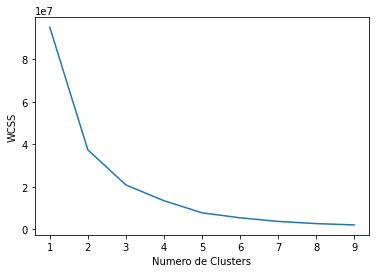

In [91]:
wcss = [] #Lista da distancia
from sklearn.cluster import KMeans
for i in range(1, 10):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(X) #FAZ O TREINAMENTO, OU SEJA, VOCE COLOCA A BASE DE DADOS QUE VOCE DESEJA TREINAR
        wcss.append(kmeans.inertia_) #Salva o valor da distancia entre cada dado na lista wcss
        
#Grafico
import matplotlib.pyplot as plt
plt.plot(range(1, 10), wcss)
plt.xlabel('Numero de Clusters')  
plt.ylabel('WCSS')

### Agrupamento por: **Avg Rent** e **Quality of Life**


In [13]:
# 1. escolher e importar um modelo
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [92]:
model = KMeans(n_clusters=4)

In [93]:
model.fit(X);

In [94]:
y_pred = model.predict(X)

In [95]:
centroides = model.cluster_centers_

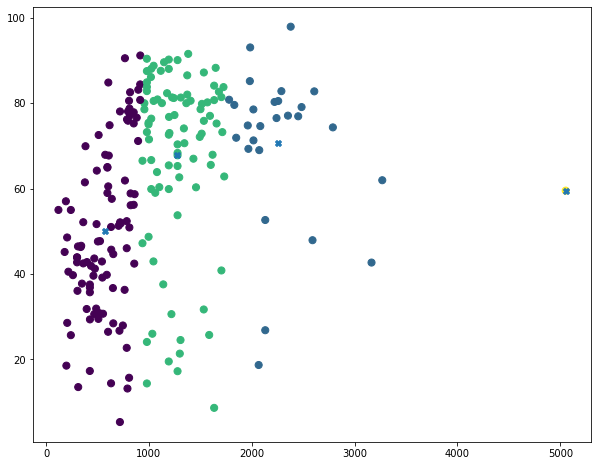

In [96]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter( 'Avg Rent', 'Quality of Life', data=X, c=y_pred, s=50, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], marker="X")
plt.show()

In [74]:
import numpy as np
lista = np.column_stack((df_concat, y_pred)) #Une a base de dados e as previsoes
lista = lista[lista[:,13].argsort()]

In [75]:
lista = pd.DataFrame(lista)

In [76]:
lista = lista[lista[13]==0].sort_values(by=11, ascending=False)

In [79]:
lista.drop(lista[lista[11]< 80].index, axis=0, inplace=True)

In [123]:
lista.sort_values(by=11, ascending=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
88,Berlin,1.88,6.82,3.84,1.36,916.42,1772.57,89.54,68.72,65.48,16.05,91.17,24.18,0
0,Aachen,2.05,6.88,4.26,1.33,767.23,1619.72,81.64,60.55,73.25,11.69,90.52,15.34,0
27,Hamilton,1.91,7.01,8.29,0.8,605.64,1593.78,81.34,56.52,86.67,81.68,84.83,35.68,0
77,Charlotte,2.15,5.23,7.19,0.6,915.28,2073.1,84.46,77.18,72.08,67.05,84.39,30.21,0
5,Liverpool,1.99,7.67,5.98,1.35,896.8,1534.47,81.23,53.78,82.86,55.35,83.14,28.7,0
56,Phoenix,2.7,6.21,6.37,0.62,817.21,2060.68,86.37,80.54,64.9,38.77,82.55,41.41,0
42,Tampa,2.45,6.21,9.81,0.6,915.28,2033.87,84.27,75.72,56.94,49.89,80.75,60.73,0
95,Belfast,2.19,5.98,6.22,1.39,807.12,1494.67,82.15,52.8,33.33,29.24,80.55,34.06,0


### Agrupamento por: **Pollution** e **Crime Rating**

In [64]:
Y = df_concat[['Pollution', 'Crime Rating']]

In [65]:
model1 = KMeans(n_clusters=4)

In [66]:
model1.fit(Y);

In [67]:
y_pred1 = model1.predict(Y)

In [68]:
centroides = model1.cluster_centers_

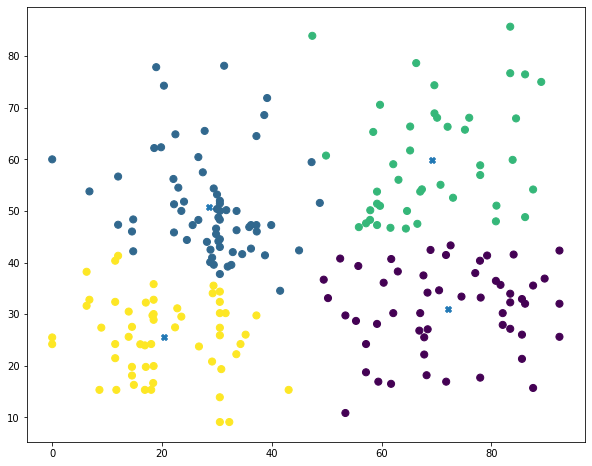

In [69]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter('Pollution', 'Crime Rating',  data=Y, c=y_pred1, s=50, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], marker="X")
plt.show()

In [90]:
import numpy as np
lista1 = np.column_stack((df_concat, y_pred1)) #Une a base de dados e as previsoes
lista1 = lista1[lista1[:,13].argsort()]

In [91]:
lista1 = pd.DataFrame(lista1)

In [92]:
lista1 = lista1[lista1[13]==3].sort_values(by=11, ascending=False)

In [93]:
lista1.drop(lista1[lista1[11]<=80].index, axis=0, inplace=True)

In [95]:
lista1.sort_values(by=11, ascending=False).head(8)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
215,Zurich,3.28,12.59,8.4,1.31,2378.61,4197.55,85.89,79.58,78.33,18.04,97.91,15.35,3
184,Canberra,2.35,11.42,10.08,0.99,1984.74,3023.91,83.23,63.26,91.9,11.48,93.05,40.36,3
192,Adelaide,2.49,11.42,10.08,0.95,1382.26,2911.69,87.29,72.03,56.25,12.01,91.54,41.32,3
188,Berlin,1.88,6.82,3.84,1.36,916.42,1772.57,89.54,68.72,65.48,16.05,91.17,24.18,3
176,Aachen,2.05,6.88,4.26,1.33,767.23,1619.72,81.64,60.55,73.25,11.69,90.52,15.34,3
174,Stuttgart,2.13,6.82,4.26,1.32,980.35,1943.66,82.48,65.82,80.38,16.89,90.4,23.96,3
180,Dresden,2.13,6.82,3.84,1.33,1193.48,2088.58,84.75,82.6,78.29,16.89,90.21,15.34,3
204,Munich,2.3,7.67,5.11,1.36,1278.72,2045.96,86,63.28,88.43,43.08,90.08,15.34,3


## Pandas Profiling

In [ ]:
!pip install pandas_profiling==2.7.1 -q

In [ ]:
!pip install pandas_profiling -q

In [ ]:
import pandas_profiling

In [ ]:
report = pandas_profiling.ProfileReport(df_merged)

In [ ]:
report.to_notebook_iframe()
report.to_file("arq")